In [1]:
import matplotlib.pylab as plt
import pickle
import numpy as np
import os

In [2]:
plt.style.use('default')
plt.rc('figure', figsize = (15,8))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [48]:
%run ising.py

  0%|                                                    | 0/20 [00:00<?, ?it/s]

TypeError: 'numpy.float64' object is not iterable

In [6]:
input_pickle = '10x10_100000-steps.pkl'
if os.path.exists(input_pickle) and os.path.getmtime('ising.py') < os.path.getmtime(input_pickle):
    pass
else:
    os.popen('python ising.py')
with open(input_pickle, 'rb') as f:
    KT     = pickle.load( f)
    changes= pickle.load( f)
    S      = pickle.load( f)
    Mhist  = pickle.load( f)
    Ehist  = pickle.load( f)
    VARhist= pickle.load( f)
    acumM  = pickle.load( f)
    acumE  = pickle.load( f)
    acumE2 = pickle.load( f)
    acumVAR= pickle.load( f)

In [7]:
S.shape

(20, 10, 10)

In [8]:
changes.shape

(100000, 2, 20)

In [9]:
Norm = changes.shape[0]*S.shape[1]*S.shape[2]

In [10]:
Norm

10000000

# Dinámica

In [11]:
Mhist.shape

(20, 20001)

In [12]:
changes.shape

(100000, 2, 20)

Text(0, 0.5, '$M $')

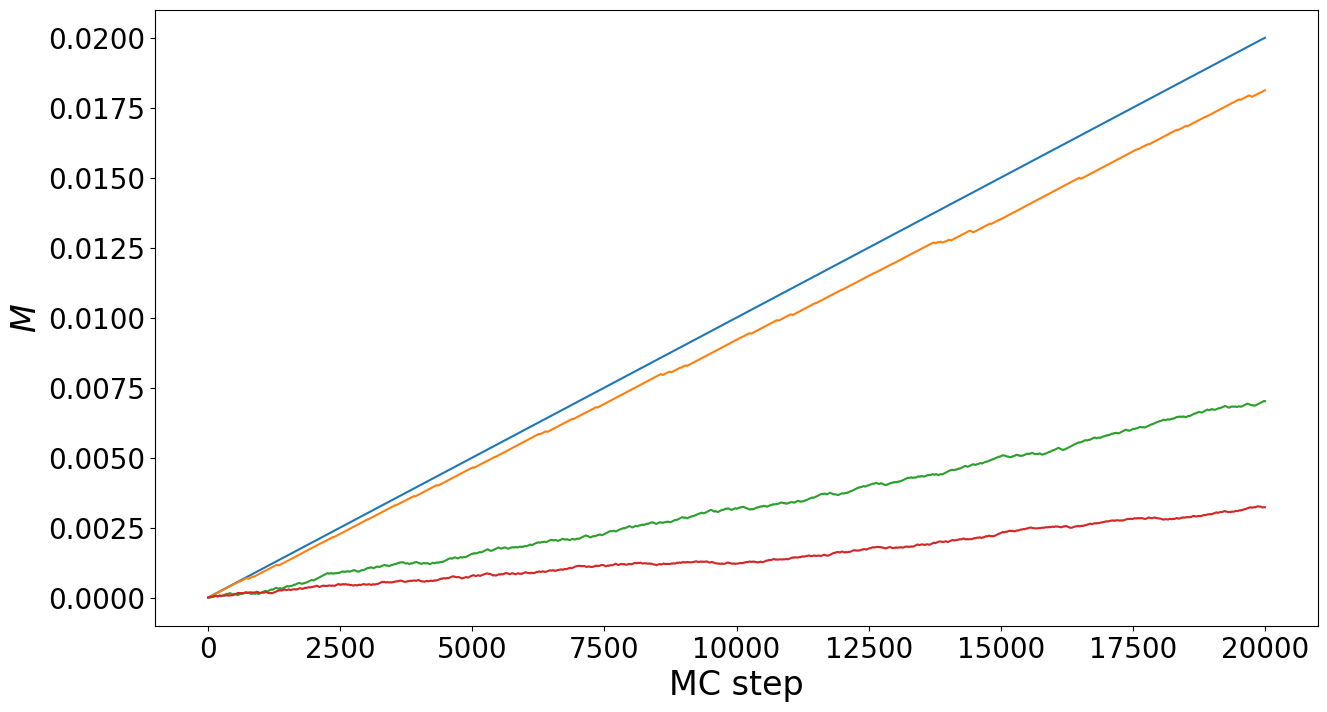

In [44]:
#plt.plot(Mhist[0]/Norm)
#plt.plot(Mhist[1]/Norm)
#plt.plot(Mhist[2]/Norm)
#plt.plot(Mhist[3]/Norm)
#plt.plot(Mhist[4]/Norm)
plt.plot(Mhist[-1]/Norm)
plt.plot(Mhist[-2]/Norm)
plt.plot(Mhist[-3]/Norm)
plt.plot(Mhist[-4]/Norm)
plt.xlabel('MC step')
plt.ylabel('$M $')

In [45]:
KT

array([4.2       , 3.31009462, 2.81615503, 2.54199519, 2.38982351,
       2.30536103, 2.25848035, 2.23245936, 2.21801648, 2.21      ,
       2.19      , 2.18198352, 2.16754064, 2.14151965, 2.09463897,
       2.01017649, 1.85800481, 1.58384497, 1.08990538, 0.2       ])

In [47]:
for i, t in enumerate(KT):
    print (t)

4.2
3.310094615569623
2.8161550277583345
2.5419951893353394
2.389823509115937
2.3053610276890666
2.2584803547642576
2.232459363470202
2.2180164823065445
2.21
2.1900000000000004
2.181983517693456
2.1675406365297984
2.141519645235743
2.0946389723109338
2.010176490884063
1.858004810664661
1.5838449722416659
1.0899053844303774
0.20000000000000018


# Promedios

In [32]:
((Ehist[10]**2)/Norm**2).sum()

0.03172031869572

In [35]:
(Ehist[10].sum()/Norm)**2/KT[10]**2

91.14359604366564

In [36]:
((Ehist[10].sum()/Norm)**2 - ((Ehist[10]**2)/Norm**2).sum())/KT[10]**2


91.13698227024646

In [37]:
((Ehist[1].sum()/Norm)**2 - ((Ehist[1]**2)/Norm**2).sum())/KT[1]**2


598.8987838896127

In [14]:
Mprom = []
for i, t in enumerate(KT):
    Mprom.append(np.abs(Mhist[i]).sum()/Norm)
    

Text(0.5, 0, 'KT')

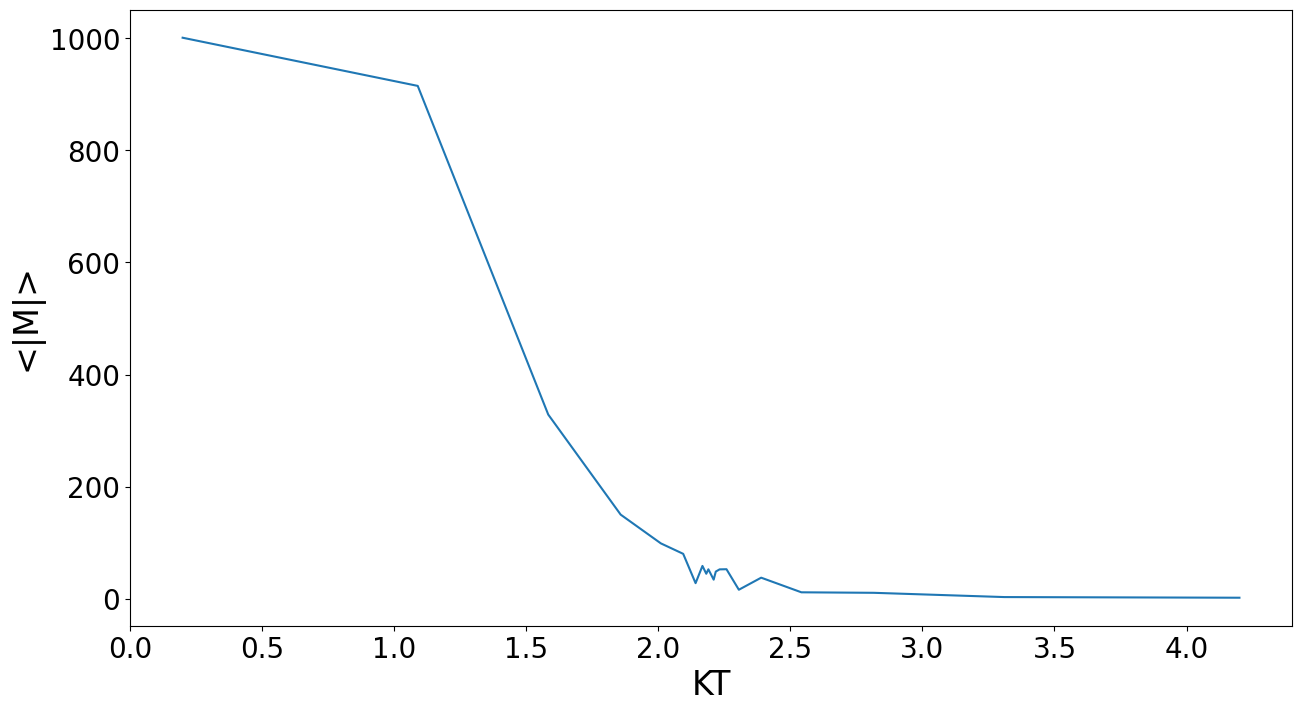

In [16]:
fig, ax = plt.subplots()
ax.plot(KT, acumM/Norm)
# ax.plot(KT, Mprom)
ax.set_ylabel('<|M|>')
ax.set_xlabel('KT')

In [17]:
_VAR = []
for i, t in enumerate(KT):
    _VAR.append( ((Ehist[i]**2).sum() - Ehist[i].sum()**2)/Norm**2/t**2)

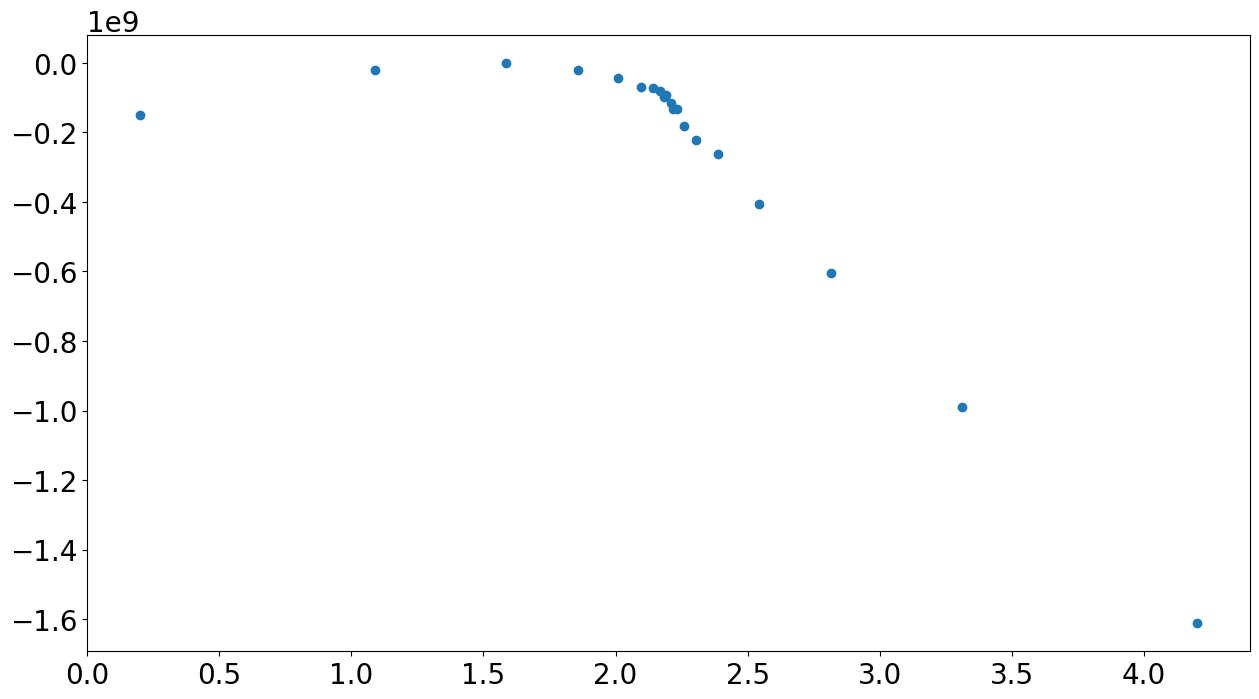

In [23]:
plt.plot(KT,acumVAR/KT/Norm**2,'o')

In [56]:
acumVAR

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

# Estados temralizados

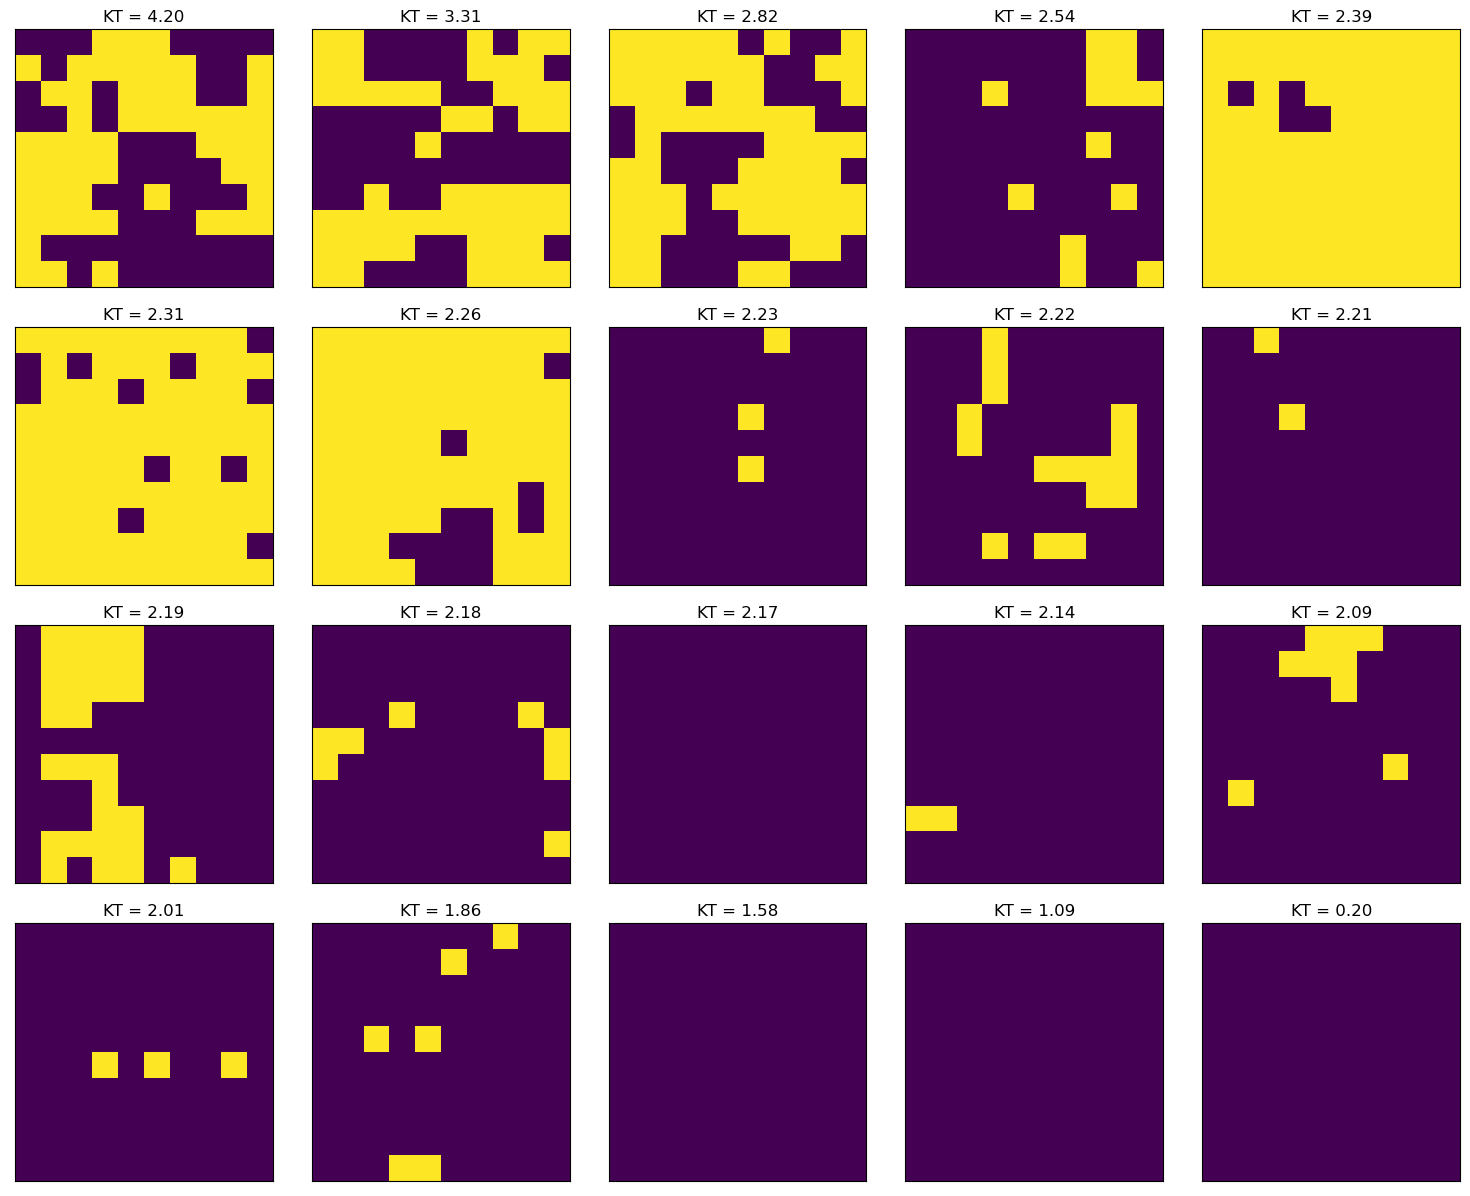

In [37]:
fig = plt.figure(figsize=(15,15))
for i, s in enumerate(S):
    ax = fig.add_subplot(int(S.shape[0]/5)+1, 5, i+1 )
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(s)
    ax.set_title('KT = {:.2f}'.format(KT[i]))
fig.tight_layout()